<a href="https://colab.research.google.com/github/mohamedhesham1299/MachineLearning/blob/main/Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [ ]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram

%matplotlib inline

In [ ]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmykrgb'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



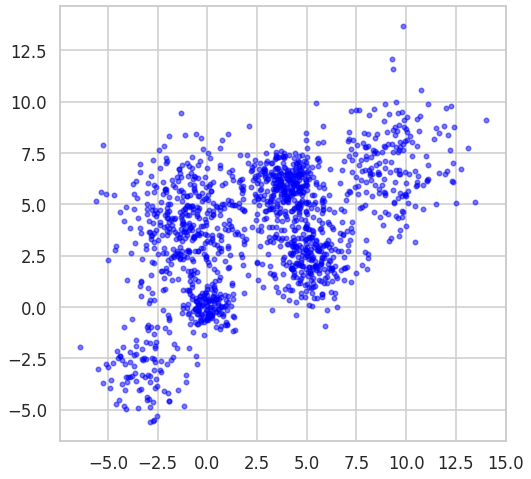

In [ ]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

(1450,)
(1450,)
(1450,)
(1450,)
(1450,)
(1450,)
(1450,)
(1450,)


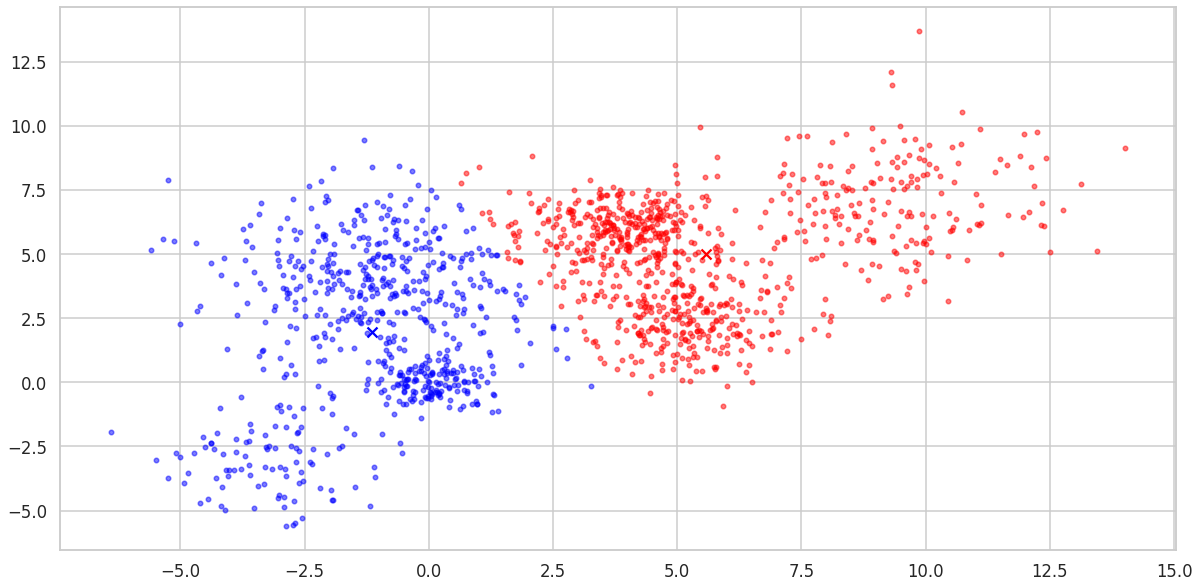

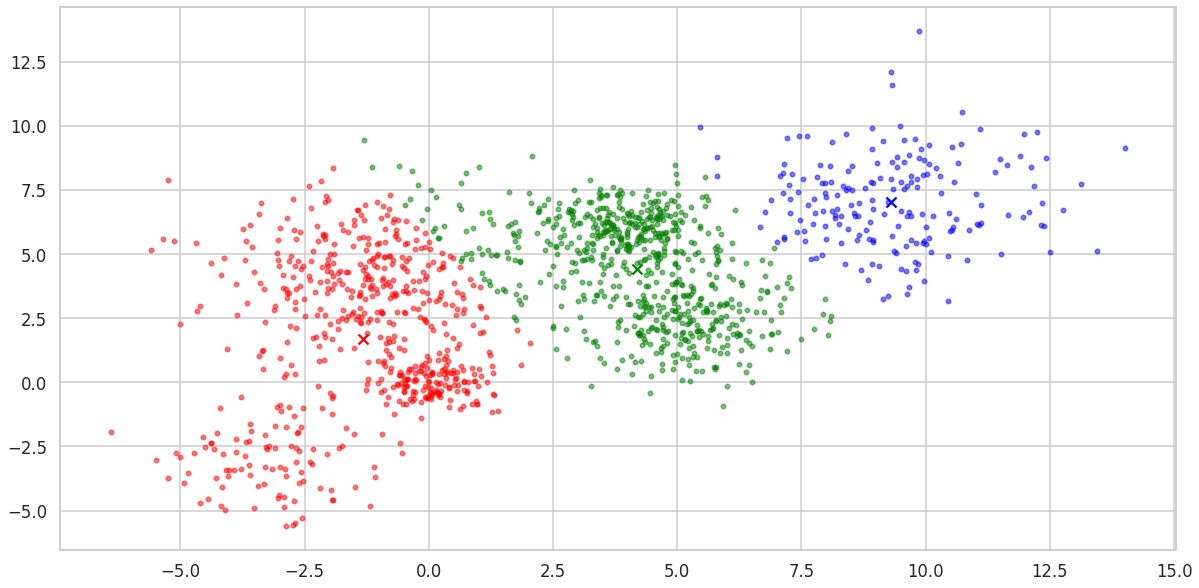

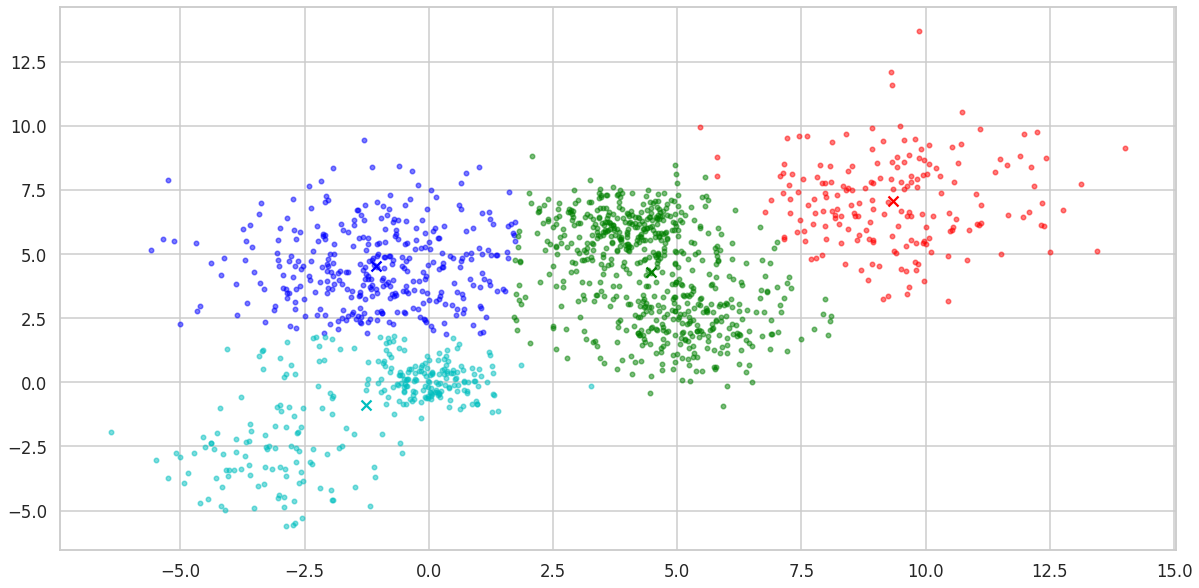

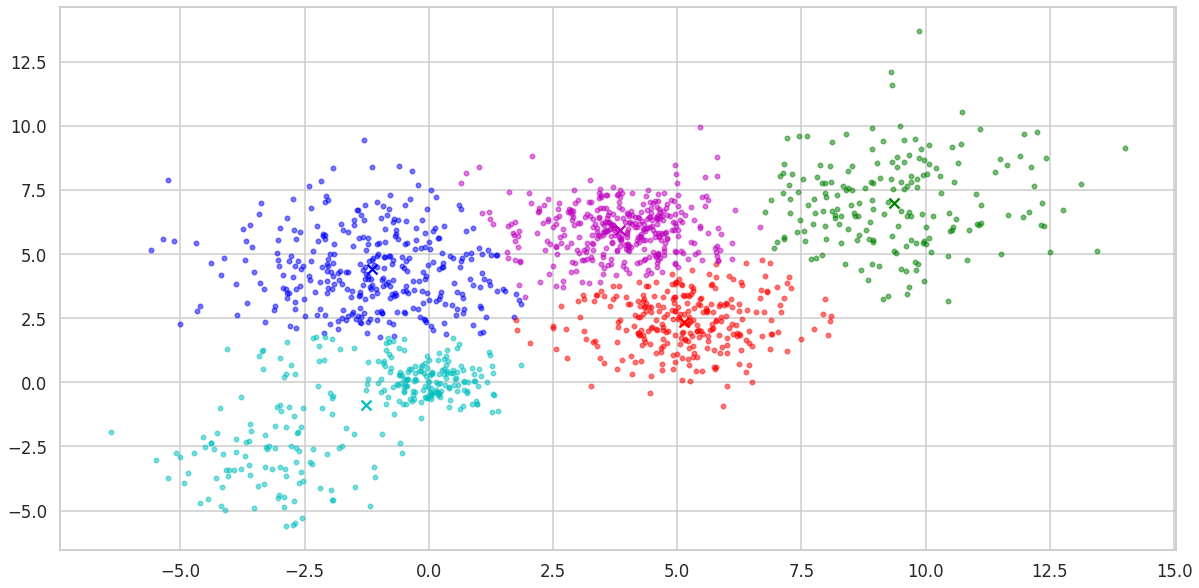

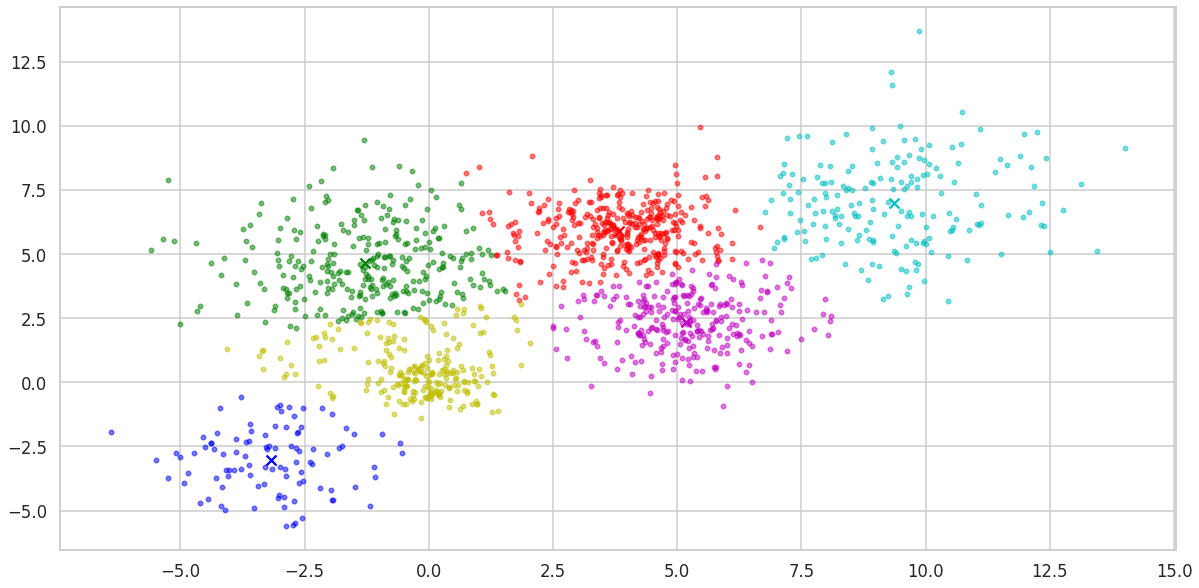

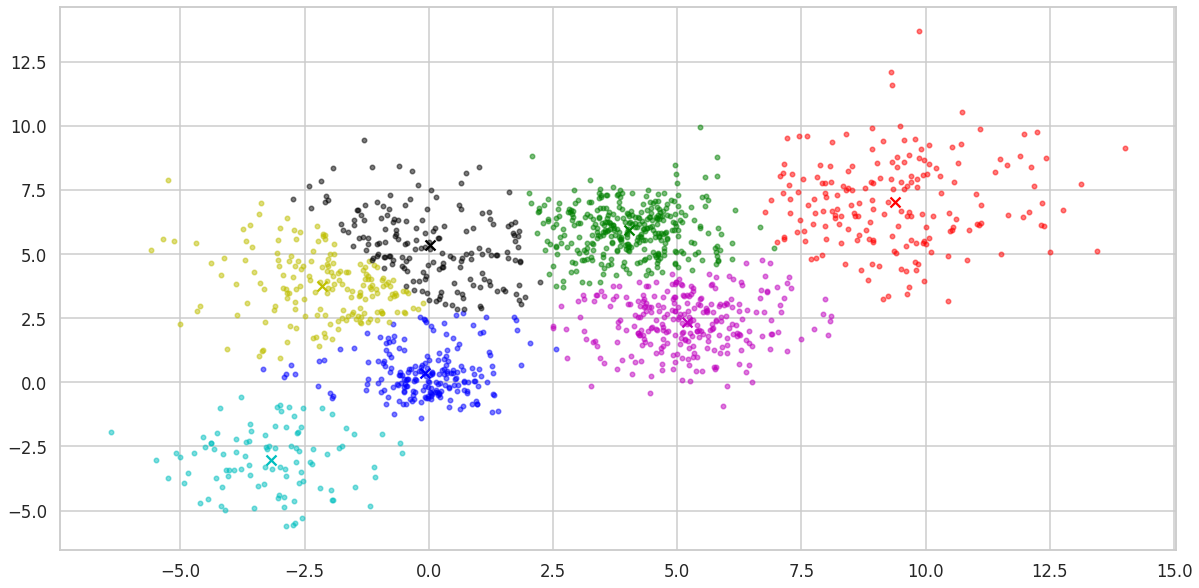

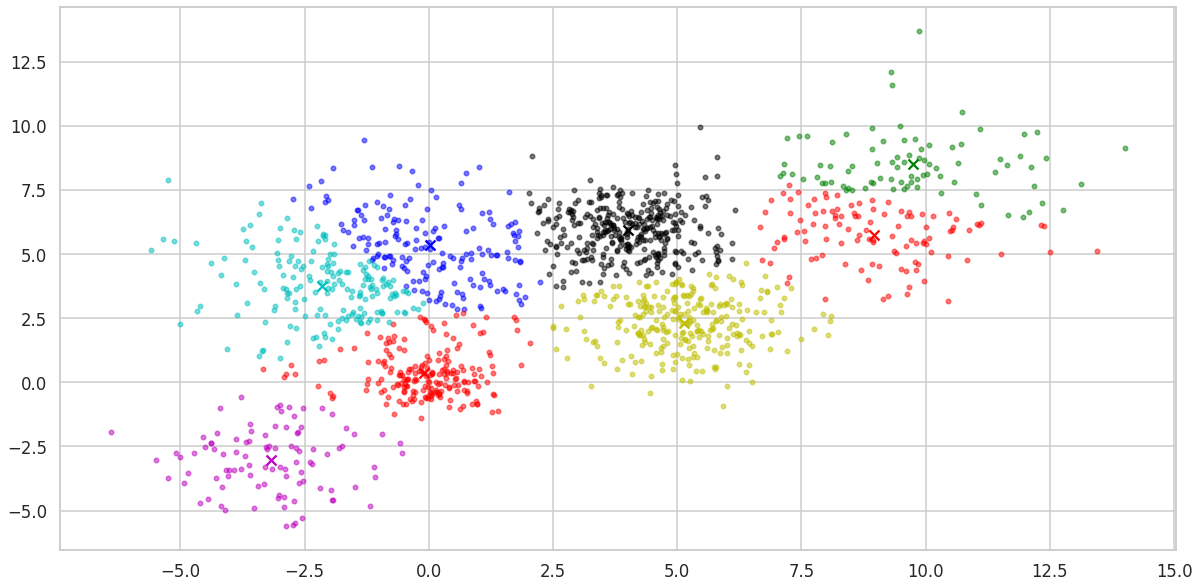

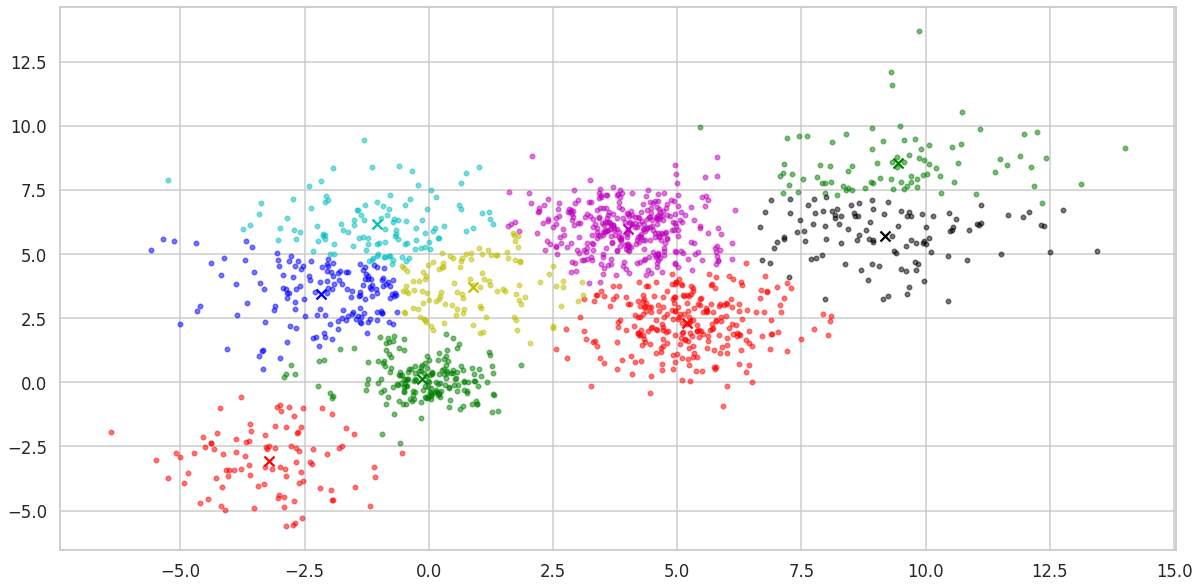

In [ ]:
total_clusters = 9
distortions = []
silhouette_coefficients = []
for num_clusters in range(2, total_clusters + 1) :
  kmeans = KMeans(n_clusters=num_clusters, random_state=0).fit(Multi_blob_Data)
  plt.figure(figsize=(20, 10))
  display_cluster(Multi_blob_Data,km=kmeans,num_clusters=num_clusters)
  distortions.append(kmeans.inertia_)
  silhouette_coefficients.append(silhouette_score(Multi_blob_Data, kmeans.labels_))
  print(kmeans.labels_.shape)

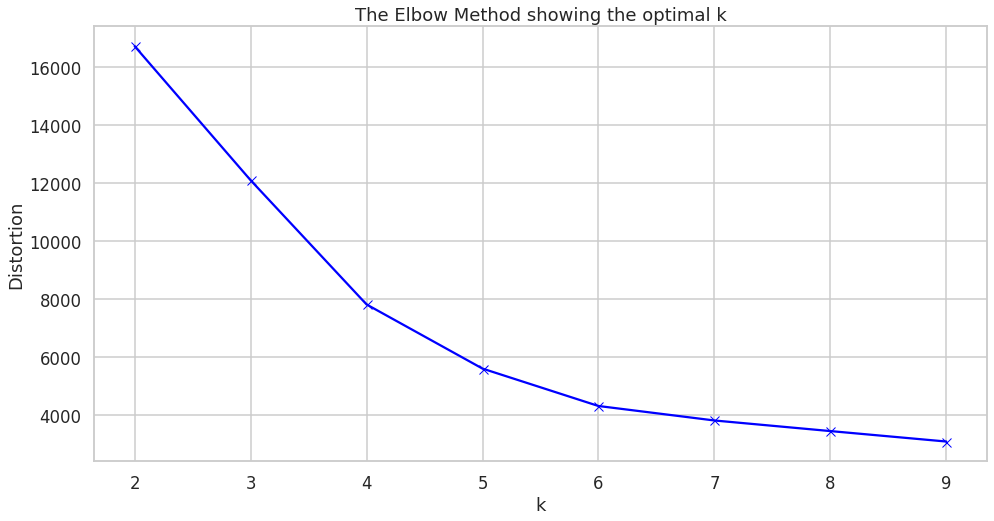

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(range(2, total_clusters + 1), distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Choose K = 9

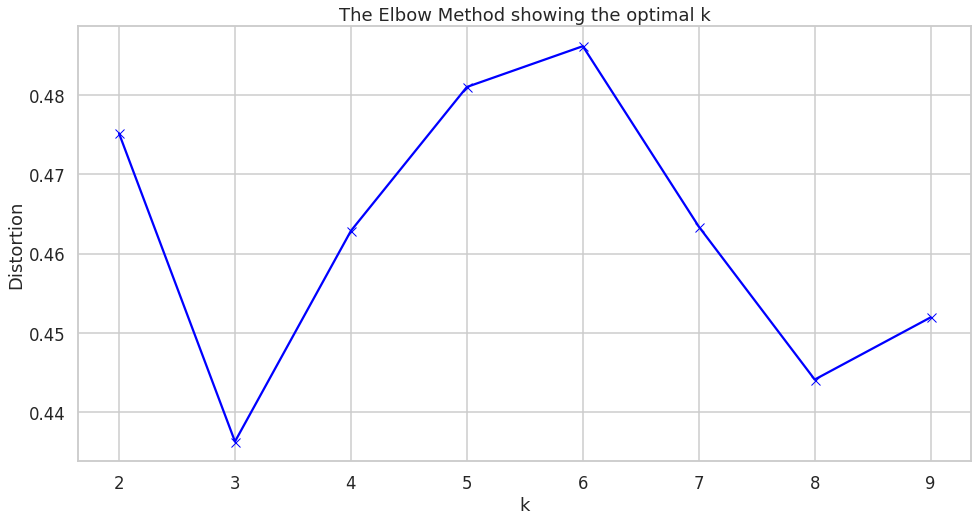

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(range(2, total_clusters + 1), silhouette_coefficients, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

K = 6

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

In [ ]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
affinity_list = ["euclidean", "manhattan", "cosine"]
linkage_list = ["average", "single"]
Distance_threshold_list = [0.2, 0.5, 1, 1.5, 2, 3, 4, 5]
silhouette_coefficients = []
for affinity in affinity_list :
  for linkage in linkage_list : 
    for threshold in Distance_threshold_list :
      model = AgglomerativeClustering(affinity=affinity, linkage=linkage, distance_threshold=threshold, n_clusters=None)
      model = model.fit(Multi_blob_Data)
      silhouette_coefficients.append(silhouette_score(Multi_blob_Data, model.labels_))
      plt.figure(figsize=(20, 10))
      plt.xticks(rotation=90)
      plot_dendrogram(model, truncate_mode="level")

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

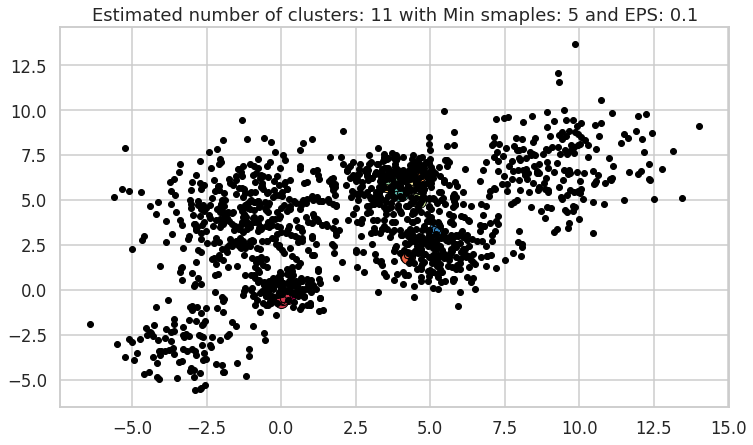

(1450,)


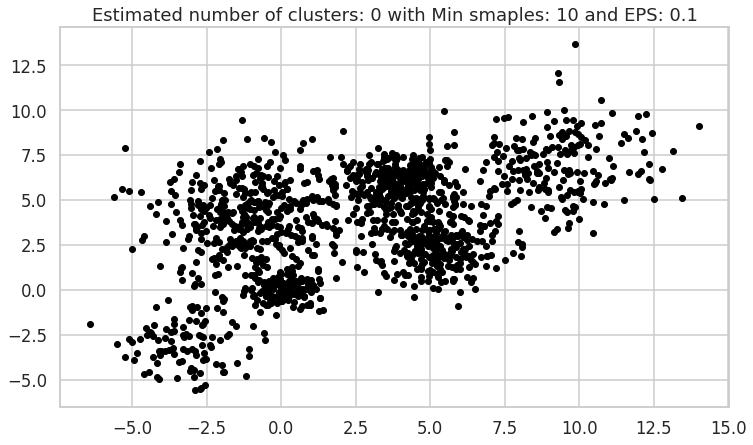

(1450,)


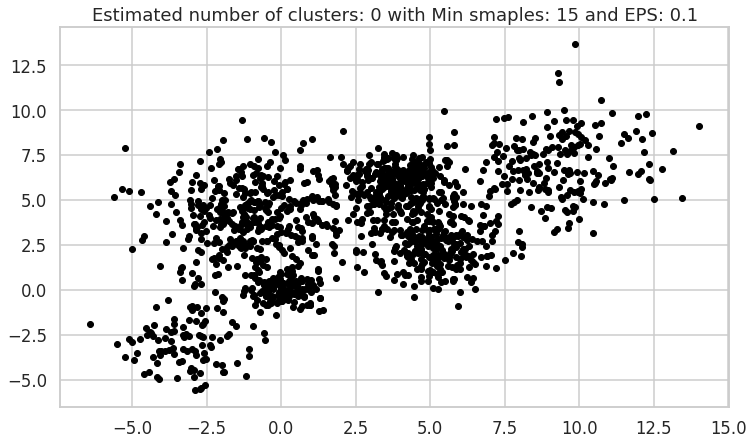

(1450,)


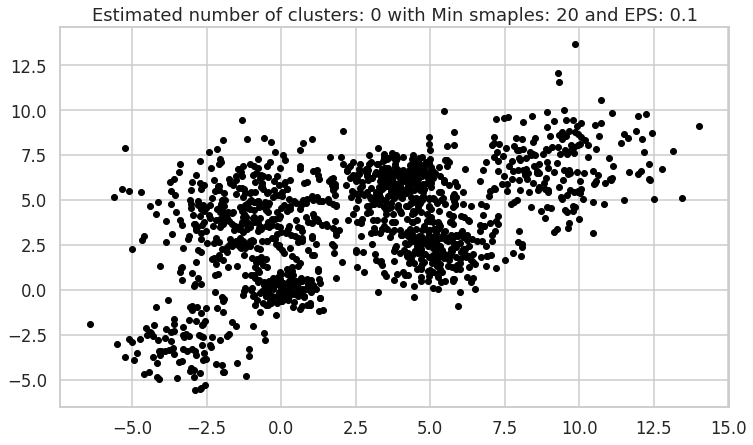

(1450,)


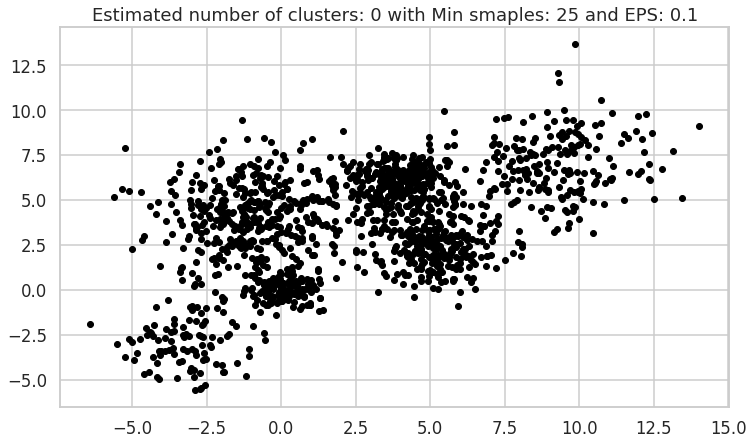

(1450,)


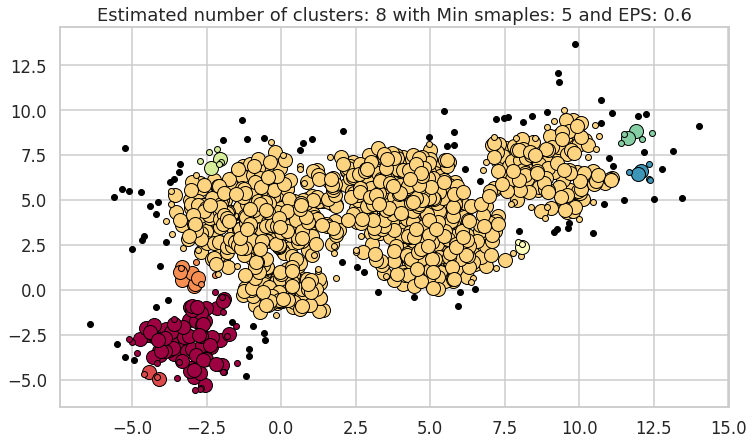

(1450,)


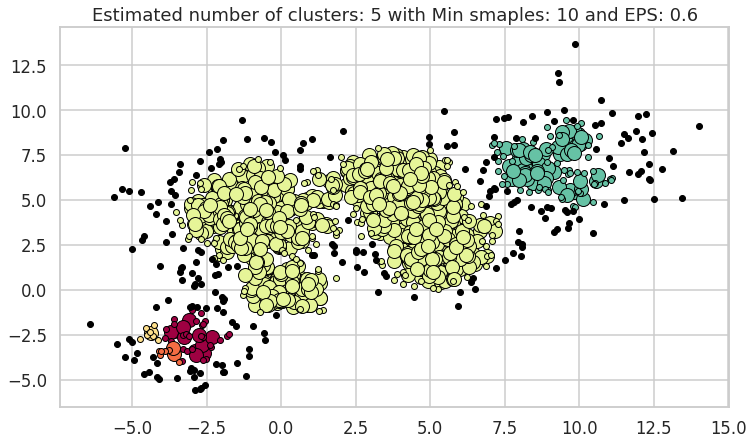

(1450,)


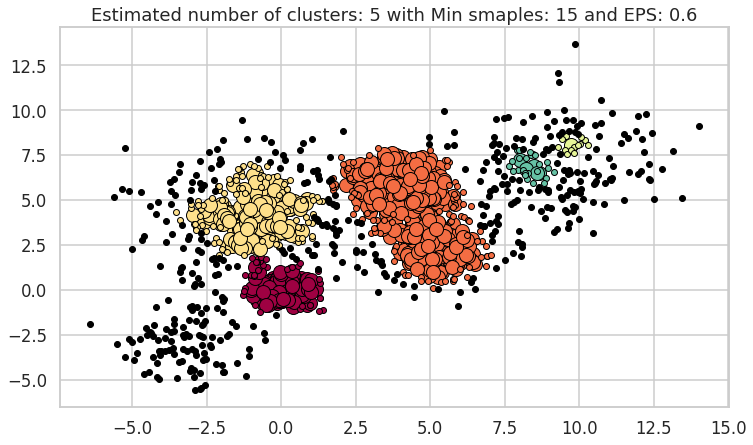

(1450,)


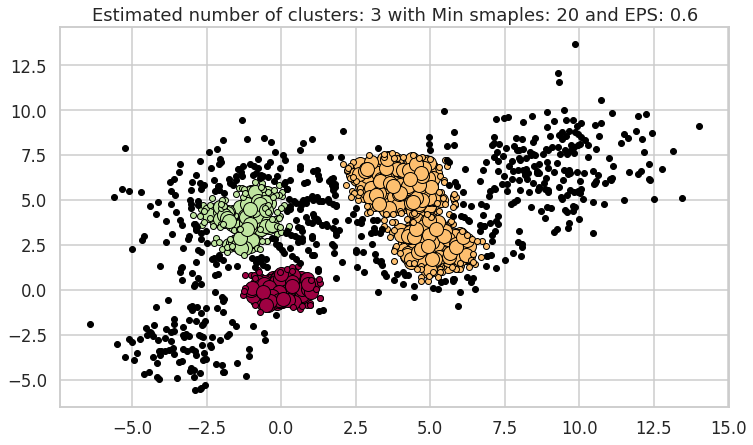

(1450,)


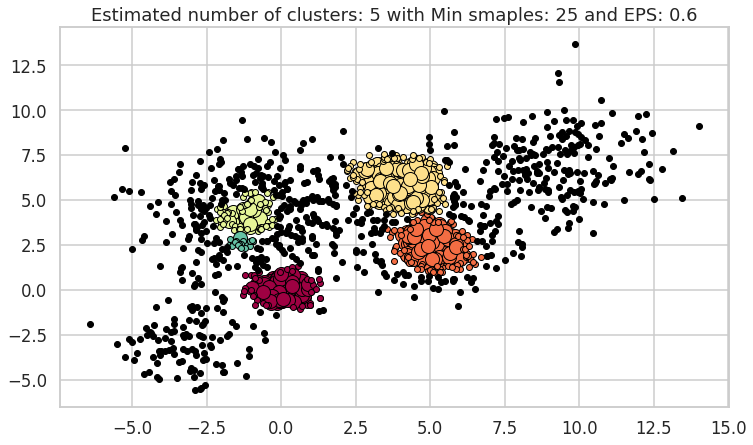

(1450,)


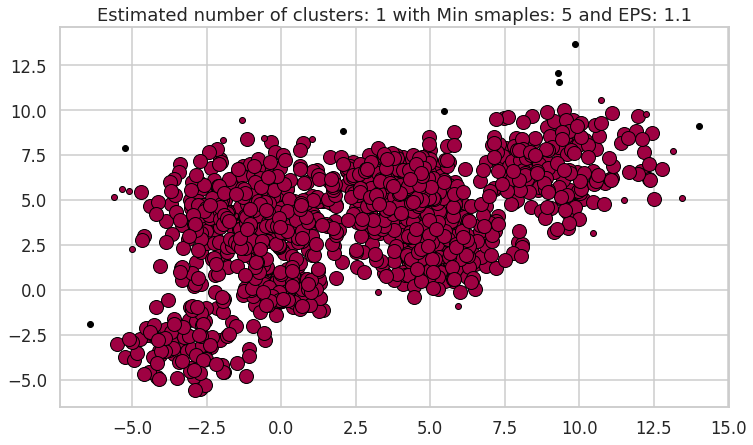

(1450,)


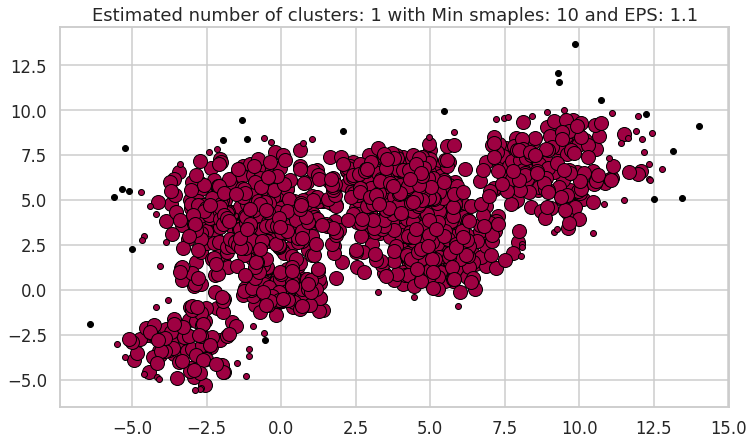

(1450,)


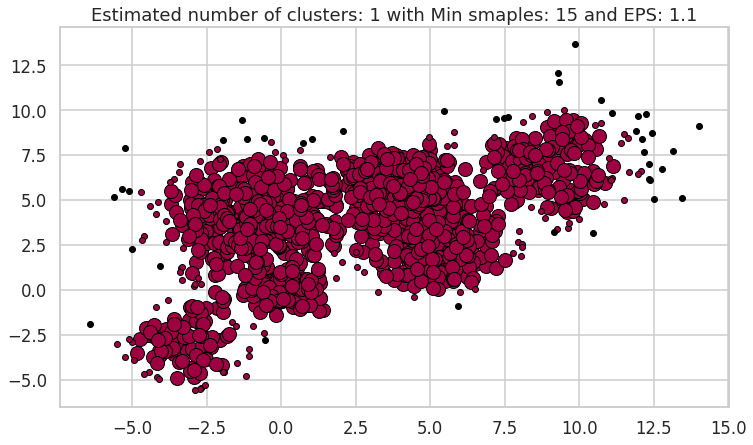

(1450,)


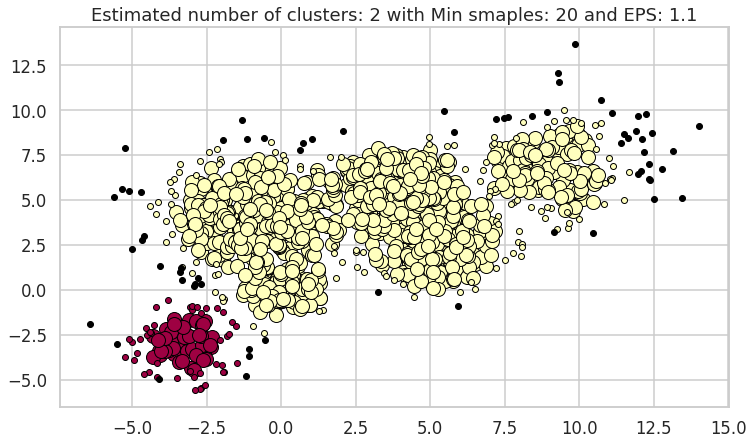

(1450,)


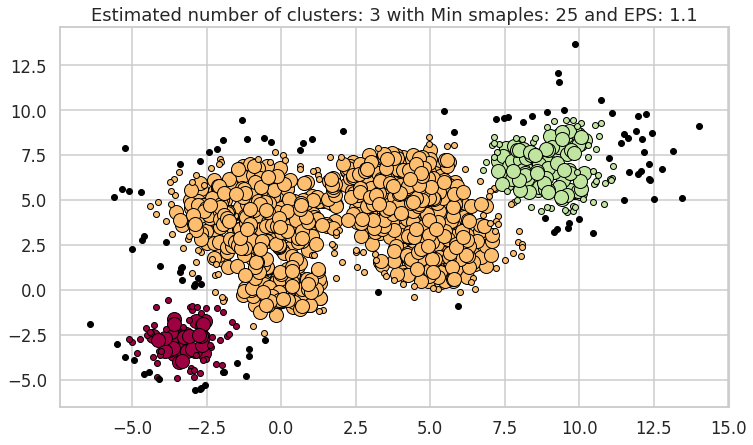

(1450,)


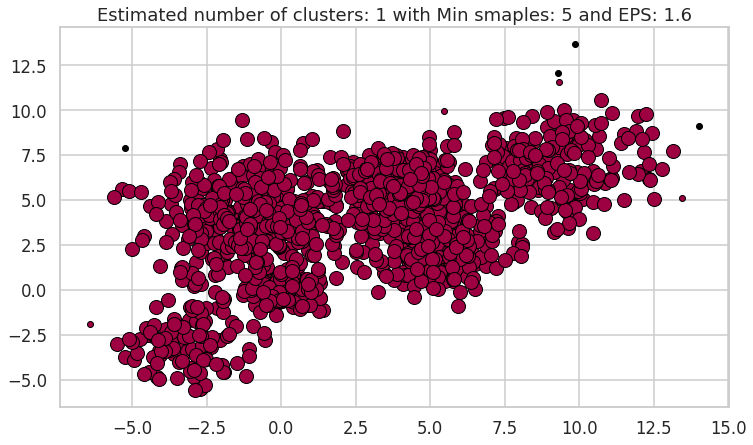

(1450,)


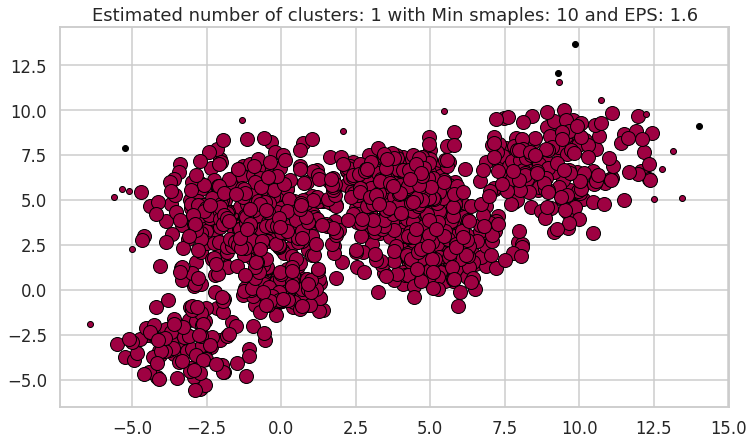

(1450,)


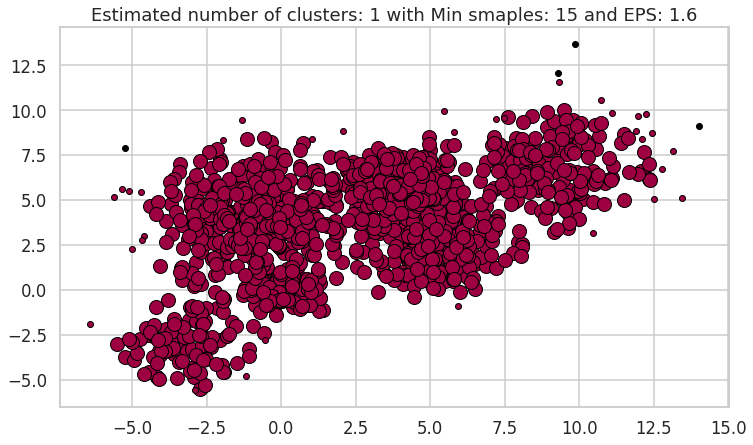

(1450,)


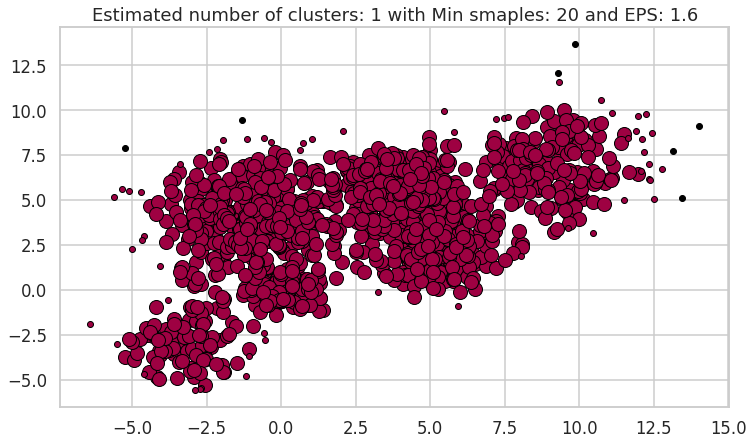

(1450,)


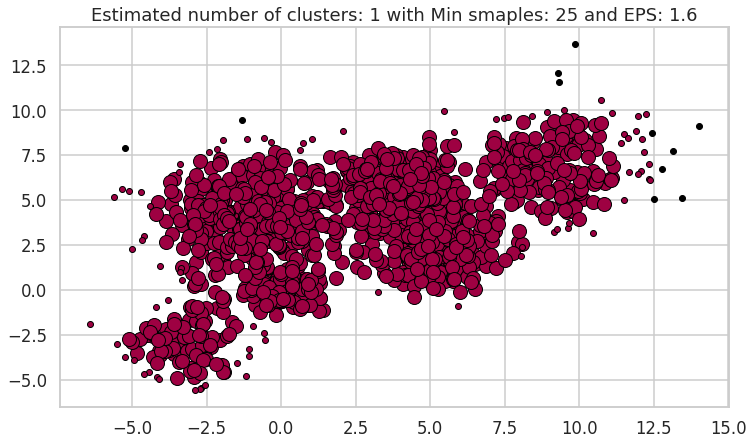

(1450,)


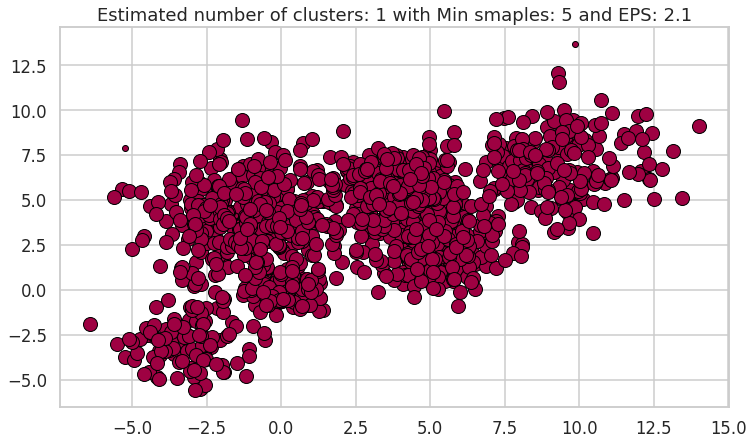

(1450,)


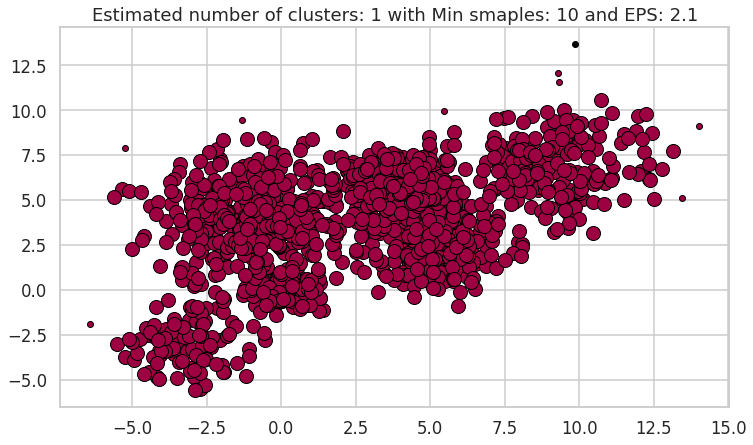

(1450,)


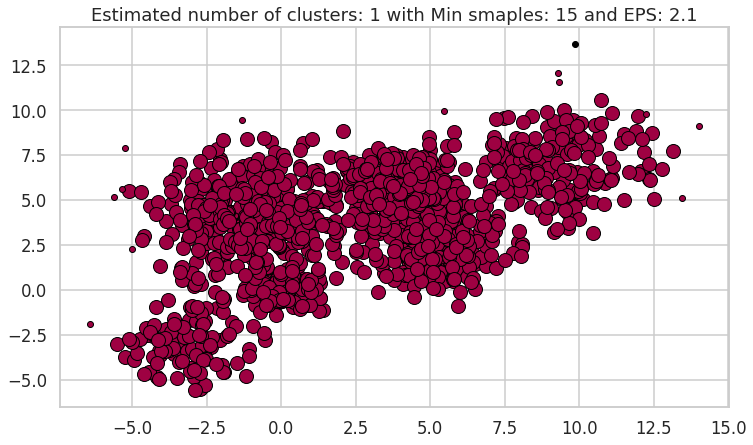

(1450,)


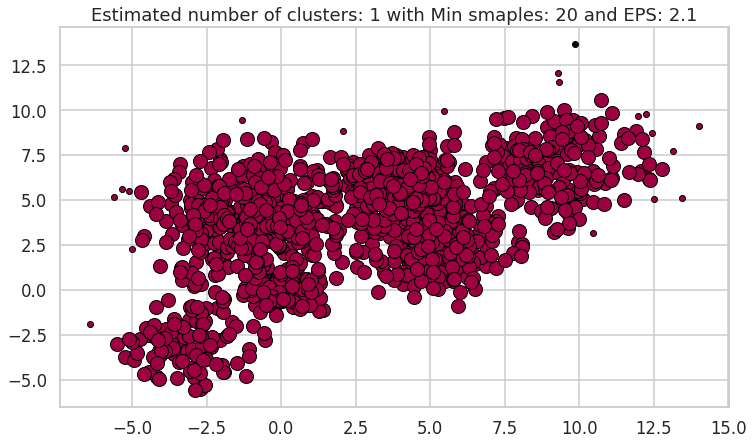

(1450,)


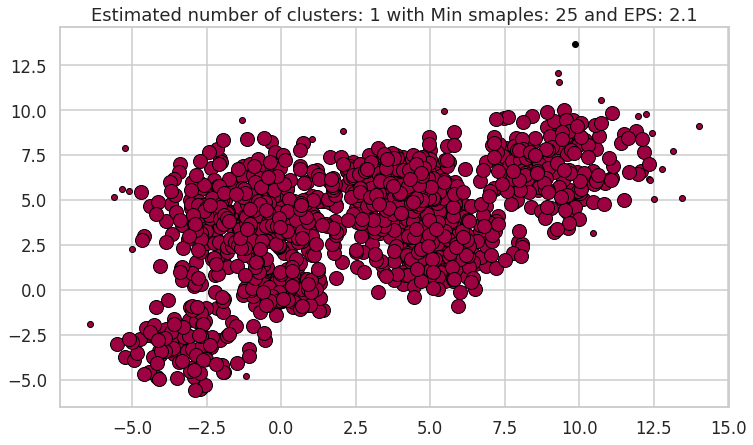

(1450,)


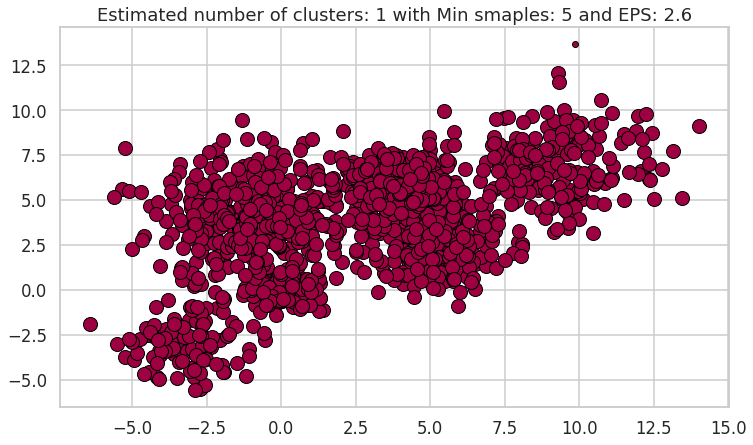

(1450,)


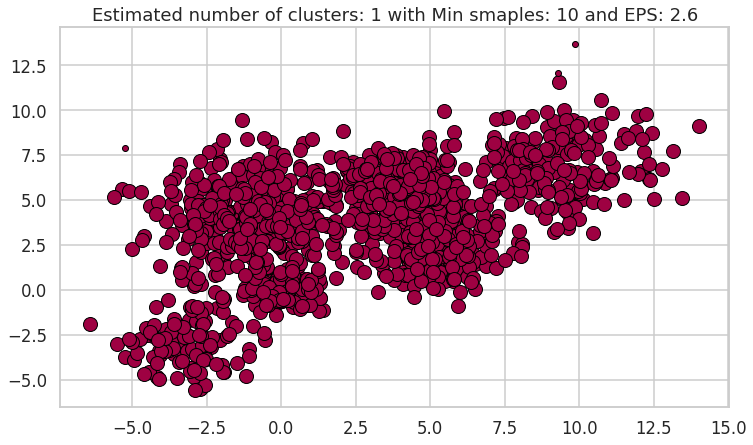

(1450,)


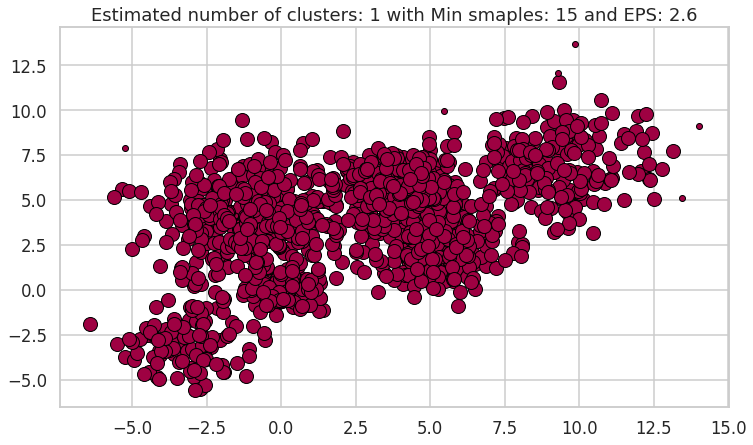

(1450,)


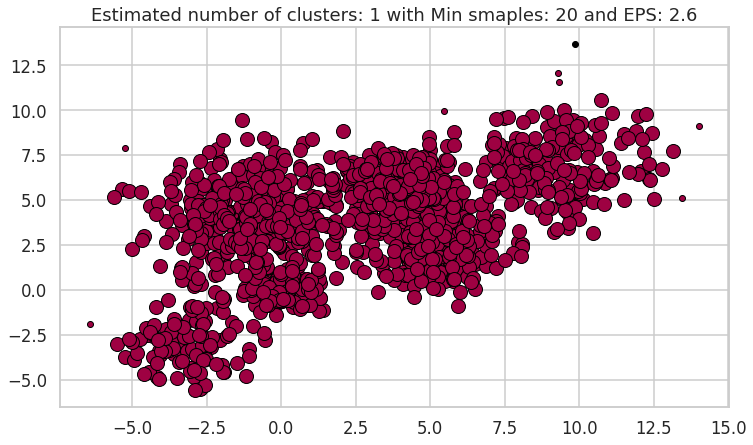

(1450,)


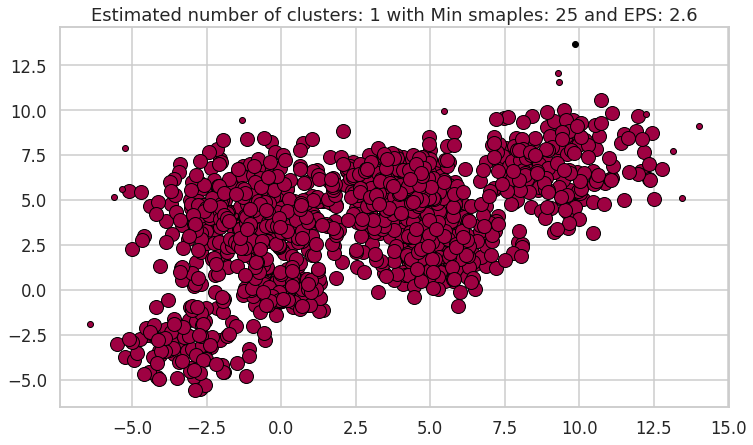

(1450,)


In [ ]:
EPS_list = (x/10 for x in range(1,31,5))
Min_samples = [5, 10, 15, 20, 25]
silhouette_coefficients = []
for eps in EPS_list :
  for min_samples in Min_samples :
    model = DBSCAN(eps=eps, min_samples=min_samples).fit(Multi_blob_Data)
    plt.figure(figsize=(12, 7))
    # Black removed and is used for noise instead.
    core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
    core_samples_mask[model.core_sample_indices_] = True
    n_clusters_ = len(set(model.labels_)) - (1 if -1 in model.labels_ else 0)
    unique_labels = set(model.labels_)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = model.labels_ == k

        xy = Multi_blob_Data[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        xy = Multi_blob_Data[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

    plt.title("Estimated number of clusters: {} with Min smaples: {} and EPS: {}".format(n_clusters_, min_samples, eps))
    plt.show()
    # silhouette_coefficients.append(silhouette_score(Multi_blob_Data, model.labels_))
    print(model.labels_.shape)

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

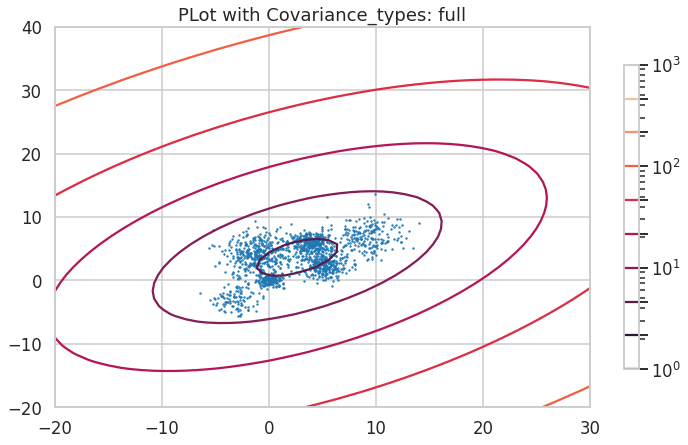

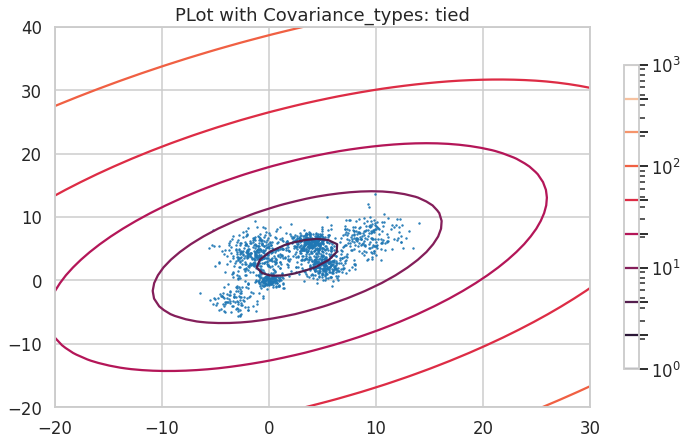

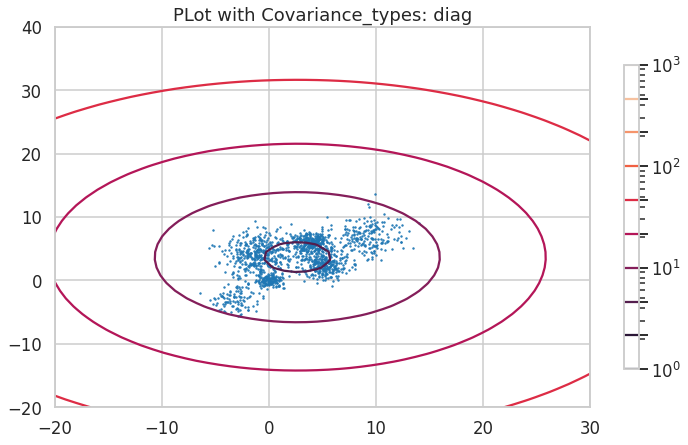

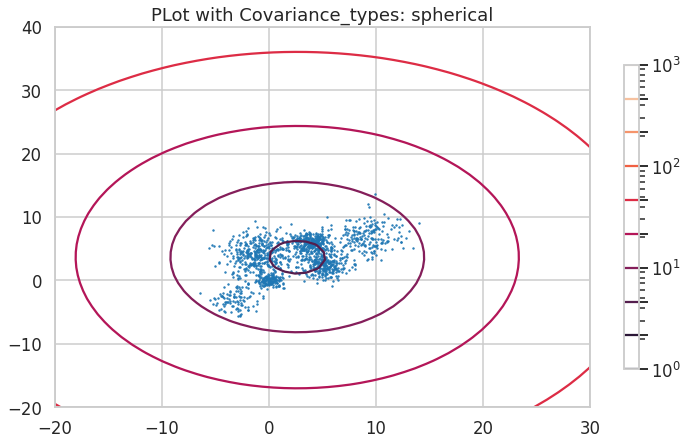

In [ ]:
from matplotlib.colors import LogNorm
covariance_types = ["full", "tied", "diag", "spherical"]
for covariance_type in covariance_types :
  model = GaussianMixture(covariance_type=covariance_type, random_state=0).fit(Multi_blob_Data)
  plt.figure(figsize=(12, 7))
  x = np.linspace(-20.0, 30.0)
  y = np.linspace(-20.0, 40.0)
  X, Y = np.meshgrid(x, y)
  XX = np.array([X.ravel(), Y.ravel()]).T
  Z = -model.score_samples(XX)
  Z = Z.reshape(X.shape)

  CS = plt.contour(
      X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10)
  )
  CB = plt.colorbar(CS, shrink=0.8, extend="both")
  plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], 0.8)

  plt.title("PLot with Covariance_types: {}".format(covariance_type))
  plt.axis("tight")
  plt.show()

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [ ]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 